# **"Unveiling Hidden Patterns: K-Means Clustering on Mall Customers Segmentation (source -> Kaggle Datasets)"**

### This project applies **K-Means clustering** on a Mall Customers Segmentation **(Kaggle dataset)**, focusing on data preprocessing, optimal cluster selection (Elbow Method), and insightful visualizations. The analysis uncovers hidden patterns, showcasing the power of **unsupervised learning** for data-driven insights.

#### "Importing the necessary libraries"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
def load_file():
    try:
        df = pd.read_csv("Mall_Customers.csv")
        print("File loaded sucessfully !")
        return df
    except FileNotFoundError:
        print("Make sure that file is located in this directory!!")
        return None
    except Exception as e :
        print(f"Error : {str(e)}")
        return None
df = load_file()

File loaded sucessfully !


# Reading First five rows of the datasets

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Reading last five rows of the datasets

In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Getting info about datasets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Observation:
 --> There was total 200 rows with 5 columns (4->intype and 1 -> object type column)

# Checking the presence of Null value in the datasets

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Findings:
--> The study founds that there was no missing value in the datasets.

# Checking the duplicate value in the datasets.

In [7]:
df.duplicated().sum()

np.int64(0)

# Findings:
--> The study founds that there was no duplicate value was in datasets.

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
genre_count = df["Genre"].value_counts()
genre_count

Genre
Female    112
Male       88
Name: count, dtype: int64

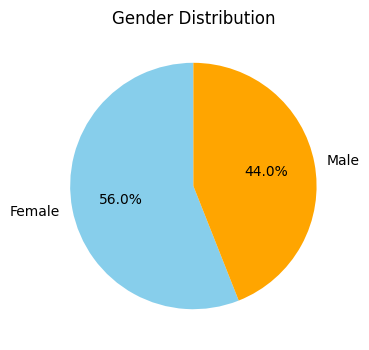

In [11]:
plt.figure(figsize=(4, 4))
genre_count.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Hides the y-label for cleaner look
plt.show()

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Selecting relevant features for segmentation / clustering

In [13]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Feature scaling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled[:10]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002]])

In [17]:
print(type(X_scaled))

<class 'numpy.ndarray'>


# Finding optimal clusters using Elbow Method

In [18]:
inertia = []
for k in range(1,11):
    # Applying K-Means clustering
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    

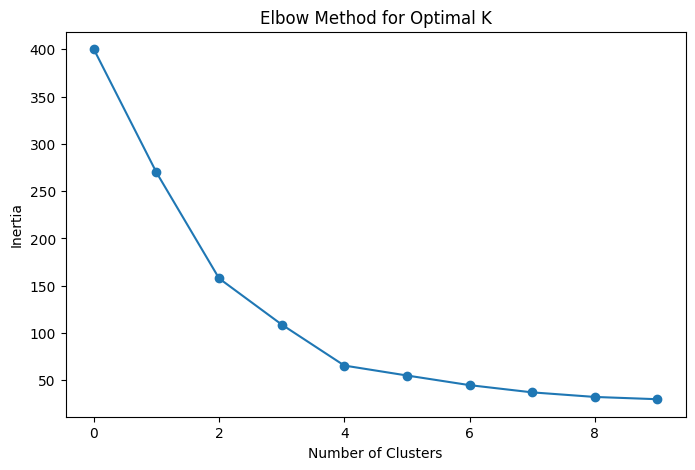

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('Elbow_method_image.png')
plt.show()

# Observation:

## The figure illustrates the **Elbow Method** for determining the optimal number of clusters (K) in a clustering algorithm like K-Means.

- **X-axis**: Represents the **number of clusters (K)**, ranging from 1 to 10.
- **Y-axis**: Represents the **inertia** which measures how tightly the data points are grouped within clusters. Lower inertia means better clustering.
- **Trend**: As the number of clusters increases, inertia decreases because the clusters become smaller and more tight.
- **Elbow Point**: The optimal number of clusters is where the curve bends (the "elbow"), indicating a balance between reducing inertia and avoiding overfitting.
  
## Conclusion:
The figure helps identify the best K value for clustering, where adding more clusters no longer significantly improves the model.


# Choosing best optimal clusters from elbow method ( k = 5)

In [20]:
model = KMeans(n_clusters = 5, random_state=42, n_init=10)
model.fit(X_scaled)
df["Cluster"] = model.labels_

# Visualizing the Clusters

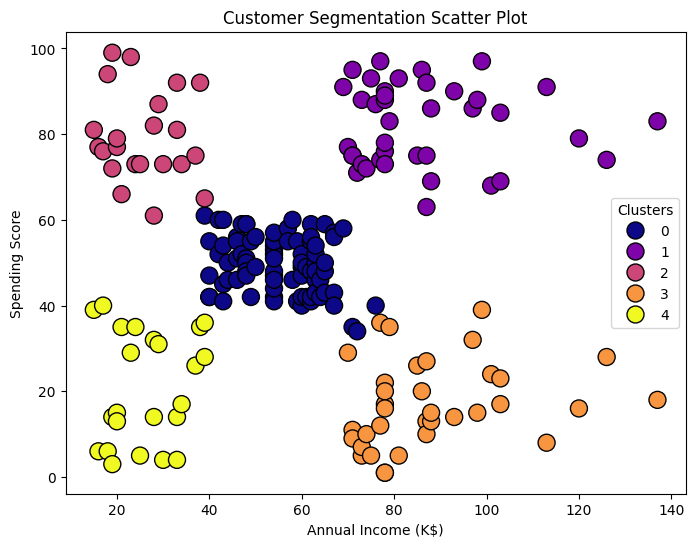

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='plasma', s=150, edgecolor='black')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation Scatter Plot")
plt.legend(title="Clusters")
plt.savefig("customer_segmentation_scatter_plot.png")
plt.show()

In [22]:
cluster_counts = df['Cluster'].value_counts()
print("Number of customers in each cluster:")
print(cluster_counts)

Number of customers in each cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


---
# Customer Segmentation Breakdown

The scatter chart above shows how different groups of customers are organized based on their spending habits and income. Each group has its own unique way of spending, helping us understand customer behavior better.

### **Cluster 0 (Blue Dots)**:
- **Number of Customers**: 81
- **Spending Score**: 40 to 60 (spends less)
- **Annual Income**: $40,000 to $65,000 (average income)
  
**What we know about them**:  
This group tends to spend less and is more careful with their money. They make smaller or fewer purchases, likely focusing on essentials. Their income is average, so they probably stick to a budget.

---

### **Cluster 1 (Purple Dots)**:
- **Number of Customers**: 39
- **Spending Score**: 65 to 95 (spends moderately)
- **Annual Income**: $65,000 to $110,000 (middle to upper-middle income)
  
**What we know about them**:  
These customers have a balanced spending pattern. They can afford to shop regularly, but they're not big spenders. Their income is on the higher side of average, so they're financially stable but not spending money on something special or luxury.

---

### **Cluster 2 (Pink Dots)**:
- **Number of Customers**: 22
- **Spending Score**: 70 to 100 (spends more)
- **Annual Income**: $10,000 to $40,000 (low income)
  
**What we know about them**:  
Despite having a lower income, this group tends to spend more. They likely focus on purchasing essentials or affordable items rather than luxury goods, showing that they prioritize their needs.

---

### **Cluster 3 (Orange Dots)**:
- **Number of Customers**: 35
- **Spending Score**: 10 to 40 (spends less)
- **Annual Income**: $65,000 to $110,000 (moderate to high income)
  
**What we know about them**:  
This group has a decent income but spends less. They may be more cautious with their finances or simply don’t prioritize shopping as much, even though they can afford to.

---

### **Cluster 4 (Yellow Dots)**:
- **Number of Customers**: 23
- **Spending Score**: 5 to 40 (spends very little)
- **Annual Income**: $5000 to $40,000 (low income)
  
**What we know about them**:  
This group spends very little due to having a lower income. They’re super careful with how they spend their money, sticking mostly to essentials and avoiding unnecessary purchases.

---

# Key Insights & Ideas

1. **Budget-friendly customers**:  
   - Clusters 0, 3, and 4 represent people who are more cautious with their spending. Cluster 4, is a low-income group, so offering them discounts or focusing on budget-friendly items could be really effective.

2. **Moderate spenders**:  
   - Cluster 1 represents customers with a balanced spending pattern. These customers may respond well to mid-range products or regular promotions that offer value without being too expensive.

3. **Targeting by income**:  
   - Even lower-income groups like Cluster 2 and Cluster 4 still show spending behavior. Focusing on affordable essentials or budget-friendly products could help increase sales with these groups.

4. **Luxury options for higher-income customers**:  
   - For customers in Cluster 3 (who have higher incomes), offering higher-end products or exclusive deals could encourage them to spend more, as they may be more careful with their spending despite having the means to spend more.

5. **Personalized offers**:  
   - Understanding both income and spending habits can help tailor marketing efforts. Offering personalized deals and product suggestions that match their behavior can lead to more engagement and higher sales.

---
